In [9]:
#Normalize Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline


In [11]:
df = pd.read_csv("angthong.csv")
df.head()

,Unnamed: 0,b,c,d,e,f,g,h,i,j,...,New_Construction,Working,household,ath_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,1995,38142,1366,396,2994,265,22,471,1221,465,...,341.55,150762,72960,269,32174.85,7650,80.5,59467274,95.591759,1406310.1
1,1996,43923,1859,795,3242,263,22,518,1449,546,...,338.24,149023,73568,270,32324.20,14120,80.6,60130186,91.687820,1411039.3
2,1997,45409,1920,643,3454,292,25,451,1523,650,...,334.93,140929,74176,271,32780.45,20590,78.6,60846582,92.229538,1806682.0
3,1998,48542,2505,572,3347,357,24,360,1500,739,...,331.62,137507,74784,273,32595.48,69674,80.7,61585103,93.556351,2248089.4
4,1999,44119,1861,438,2984,312,28,349,1327,812,...,328.31,133313,75392,274,32910.83,33530,78.7,62298571,97.298302,2214248.7


In [12]:
#df(columns=['b','c','d','e','f','g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q','r','s','t','u'])

In [13]:
at2 = df.drop(['Unnamed: 0','c','d','e','f','g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q','r','s','t','u'], axis=1)
at2

,b,ฺBirths,Farm_holding,New_Construction,Working,household,ath_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,38142,3021.5,471408,341.55,150762,72960,269,32174.85,7650,80.5000,59467274,95.591759,1406310.1
1,43923,3000.8,467986,338.24,149023,73568,270,32324.20,14120,80.6000,60130186,91.687820,1411039.3
2,45409,2980.1,466045,334.93,140929,74176,271,32780.45,20590,78.6000,60846582,92.229538,1806682.0
3,48542,2959.4,463690,331.62,137507,74784,273,32595.48,69674,80.7000,61585103,93.556351,2248089.4
4,44119,2938.7,473748,328.31,133313,75392,274,32910.83,33530,78.7000,62298571,97.298302,2214248.7
5,42637,3196.0,444372,325.00,133785,76000,275,33393.90,68405,79.9000,62952642,97.614937,2768064.8
6,43243,2311.0,307924,321.69,140776,74796,273,35257.17,68279,80.9000,63539196,97.082878,2884703.9
7,47118,2314.0,327521,318.38,149906,77216,272,34728.81,82485,79.7000,64069087,98.669701,2923941.4
8,51690,2908.0,379672,344.00,144673,77824,270,33841.03,104571,79.2000,64549866,97.747000,3325630.1
9,57309,2830.0,486837,296.00,145485,76290,268,33060.87,116585,78.2000,64995299,101.420692,3873689.6


In [14]:
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.000000,0.000000,0.000000,0.012311,0.233831,0.008826,0.000000,0.116291,0.000000,0.000000,...,0.762059,0.536216,0.000000,0.76,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.043478,0.068808,0.094553,0.201231,0.298769,0.007468,0.000000,0.140911,0.072243,0.078185,...,0.742588,0.482776,0.043478,0.80,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.086957,0.086494,0.106252,0.129261,0.354281,0.027155,0.029703,0.105815,0.095691,0.178571,...,0.723118,0.234043,0.086957,0.84,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.130435,0.123784,0.218450,0.095644,0.326263,0.071283,0.019802,0.058146,0.088403,0.264479,...,0.703647,0.128884,0.130435,0.92,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.173913,0.071140,0.094937,0.032197,0.231212,0.040733,0.059406,0.052383,0.033587,0.334942,...,0.684176,0.000000,0.173913,0.96,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552


In [15]:
df_normalized.to_csv("nor_ath.csv")

In [16]:
list(df)

['Unnamed: 0',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'ฺBirths',
 'Farm_holding',
 'New_Construction',
 'Working',
 'household',
 'ath_pop',
 'th_worker',
 'debt',
 'percent_import_us',
 'population',
 'Planted_area',
 'export']

In [17]:
at1 = df.drop(['Unnamed: 0','ฺBirths',
 'Farm_holding',
 'New_Construction',
 'Working',
 'household',
 'ath_pop',
 'th_worker',
 'debt',
 'percent_import_us',
 'population',
 'Planted_area',
 'export'], axis=1)
at1

,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u
0,38142,1366,396,2994,265,22,471,1221,465,0,81,948,509,0,5,456,689,277,13,71
1,43923,1859,795,3242,263,22,518,1449,546,0,97,689,606,0,4,499,743,427,22,80
2,45409,1920,643,3454,292,25,451,1523,650,2,90,662,703,1,6,571,779,434,21,91
3,48542,2505,572,3347,357,24,360,1500,739,7,93,680,831,1,4,665,962,470,21,90
4,44119,1861,438,2984,312,28,349,1327,812,16,117,502,1006,4,6,719,962,516,24,95
5,42637,2193,370,2326,265,35,268,1444,716,28,125,478,1027,5,8,790,990,529,24,105
6,43243,2405,392,2101,252,33,249,1433,773,26,161,495,970,3,13,835,1000,547,25,109
7,47118,2340,387,2799,270,30,305,1479,752,19,178,553,1050,3,12,980,1030,453,25,135
8,51690,2482,424,3236,275,30,300,1576,772,21,204,578,1143,3,23,1179,1071,460,40,131
9,57309,2881,726,3108,306,31,491,1750,835,24,222,637,1170,3,38,1198,1249,498,65,121


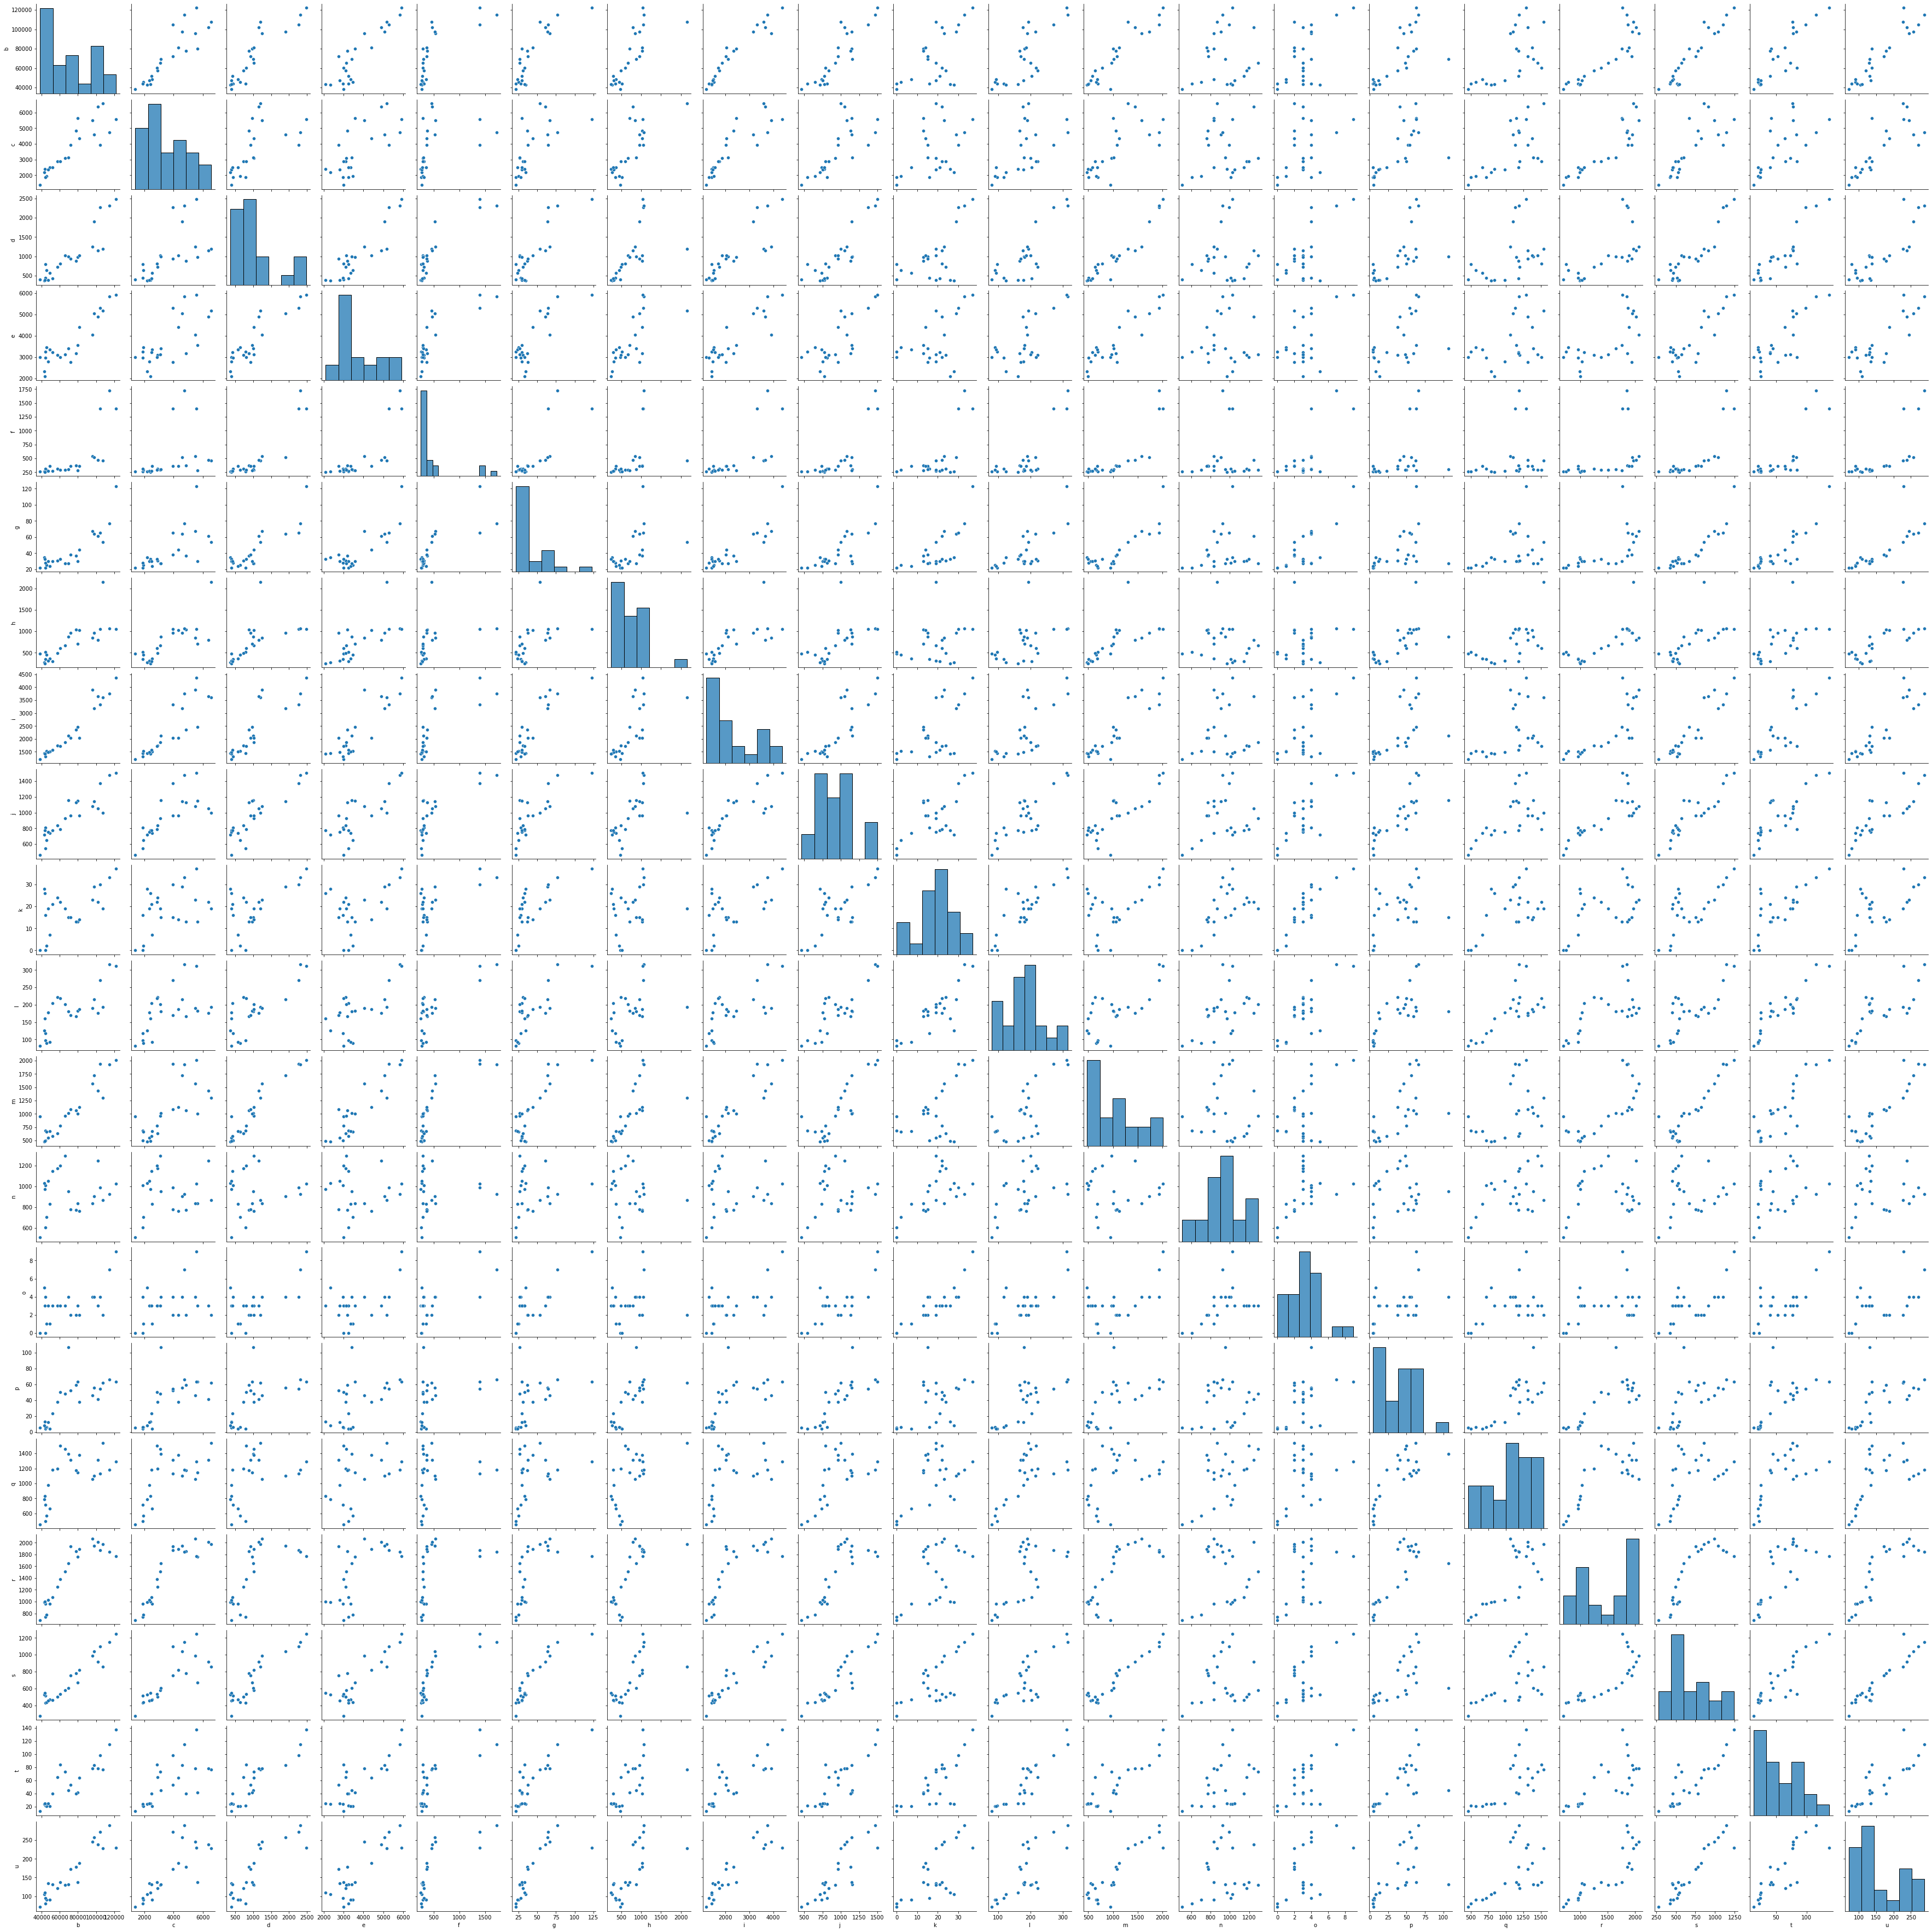

In [18]:
sns.pairplot(at1)

In [22]:
at2_1 = at2.drop(['ฺBirths','Working',
 'household',
 'ath_pop',
 'th_worker',
 'debt',
 'percent_import_us',
 'population',
 'Planted_area',
], axis=1)
at2_1

,b,Farm_holding,New_Construction,export
0,38142,471408,341.55,1406310.1
1,43923,467986,338.24,1411039.3
2,45409,466045,334.93,1806682.0
3,48542,463690,331.62,2248089.4
4,44119,473748,328.31,2214248.7
5,42637,444372,325.00,2768064.8
6,43243,307924,321.69,2884703.9
7,47118,327521,318.38,2923941.4
8,51690,379672,344.00,3325630.1
9,57309,486837,296.00,3873689.6


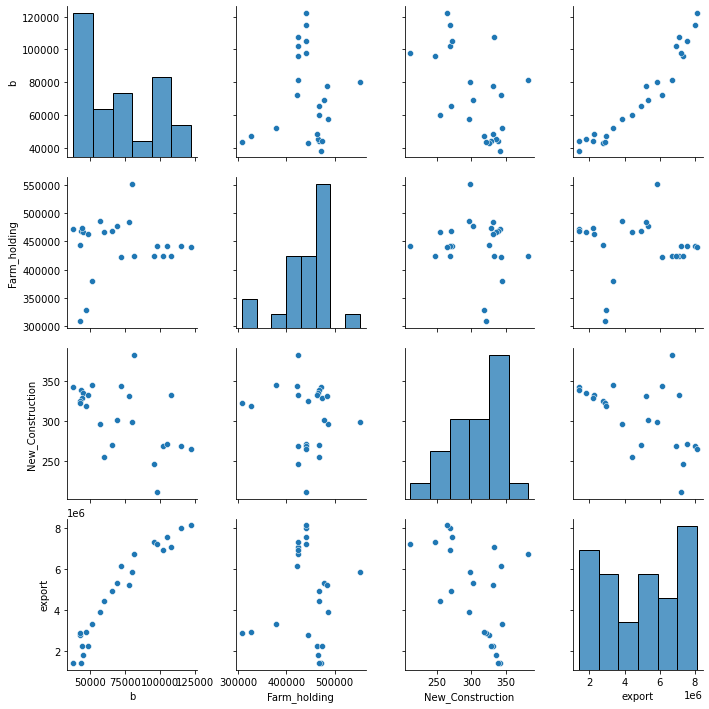

In [23]:
sns.pairplot(at2_1)

<AxesSubplot:>

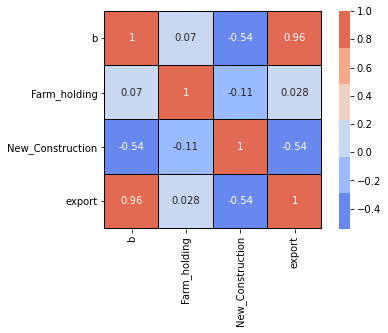

In [24]:
sns.heatmap(at2_1.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
           cmap=sns.color_palette("coolwarm"),
           annot=True)

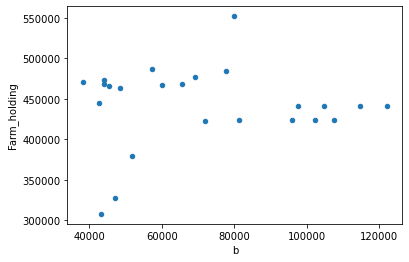

In [25]:
ax2 = at2_1.plot.scatter(x='b',
                      y='Farm_holding',
                      colormap='viridis')